# Working with ORAS5 data 

Creating an alternative climatology from this longer time series to be used with our OSNAP data

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import xarray as xr
import cmocean as cm
import marineHeatWaves as mhw
from datetime import date
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

# **Import Data**

In [3]:
file_name = "data/ORAS5.nc"
oras5 = xr.open_dataset(file_name)

In [4]:
oras5=oras5.rename({'depth':'DEPTH','time':'TIME'})
oras5

<xarray.Dataset>
Dimensions:      (DEPTH: 54, TIME: 9861, latitude: 9, longitude: 25)
Coordinates:
  * DEPTH        (DEPTH) float32 0.5058 1.556 2.668 ... 1.796e+03 1.945e+03
  * latitude     (latitude) float32 56.0 56.25 56.5 56.75 ... 57.5 57.75 58.0
  * TIME         (TIME) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * longitude    (longitude) float32 -14.0 -13.75 -13.5 ... -8.5 -8.25 -8.0
Data variables:
    thetao_oras  (TIME, DEPTH, latitude, longitude) float32 ...
    so_oras      (TIME, DEPTH, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_PHY_001_031
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          Global
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    ...                            ...
    history:                       Creation 2021-janv.-03 13:53:39 GMT+0200
    title:                         Daily mean fields for product GLOBAL_REANA...
    source:                        Copernicus Marine Service
    dataset:                       global-reanalysis-phy-001-031-grepv2-daily
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:

In [25]:
depth_E = [50, 75, 100, 250, 500, 750, 950, 1000, 1250, 1500, 1600, 1750] 
depth_W = [50, 75, 100, 250, 500, 750, 1000, 1250, 1500, 1600, 1750]

In [13]:
oras5_EB = oras5.thetao_oras.sel(latitude = 57.1, 
                           longitude = -9.6, 
                           DEPTH = depth_E,
                           method = 'nearest')
oras5_WB = oras5.thetao_oras.sel(latitude = 57.5, 
                           longitude = -12.5, 
                           DEPTH = depth_W,
                           method = 'nearest')

In [14]:
# If I should want to select a slice of time this is the syntax
#EB = EB.sel(time=slice("1990-01-01", "2019-12-31"))

In [15]:
oras5_EB

<xarray.DataArray 'thetao_oras' (TIME: 9861, DEPTH: 12)>
[118332 values with dtype=float32]
Coordinates:
  * DEPTH      (DEPTH) float32 47.21 77.61 97.04 ... 1.653e+03 1.796e+03
    latitude   float32 57.0
  * TIME       (TIME) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
    longitude  float32 -9.5
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    units:          degrees_C
    unit_long:      Degrees Celsius
    cell_methods:   area: mean
    _ChunkSizes:    [  1  15 137 288]

In [16]:
oras5_WB

<xarray.DataArray 'thetao_oras' (TIME: 9861, DEPTH: 11)>
[108471 values with dtype=float32]
Coordinates:
  * DEPTH      (DEPTH) float32 47.21 77.61 97.04 ... 1.653e+03 1.796e+03
    latitude   float32 57.5
  * TIME       (TIME) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
    longitude  float32 -12.5
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    units:          degrees_C
    unit_long:      Degrees Celsius
    cell_methods:   area: mean
    _ChunkSizes:    [  1  15 137 288]

(1500.0, 0.0)

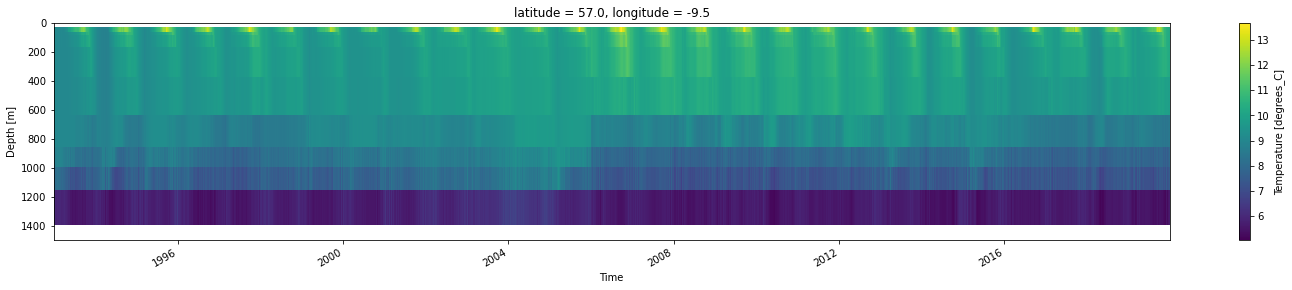

In [17]:
## it does not have data at 100m...

#EB.sel(DEPTH = 0, method = 'nearest').plot(label= 'bla')
#plt.legend()

fig, ax = plt.subplots(figsize = (25,4))
oras5_EB.plot(x='TIME', y='DEPTH')
plt.ylim(1500,0)



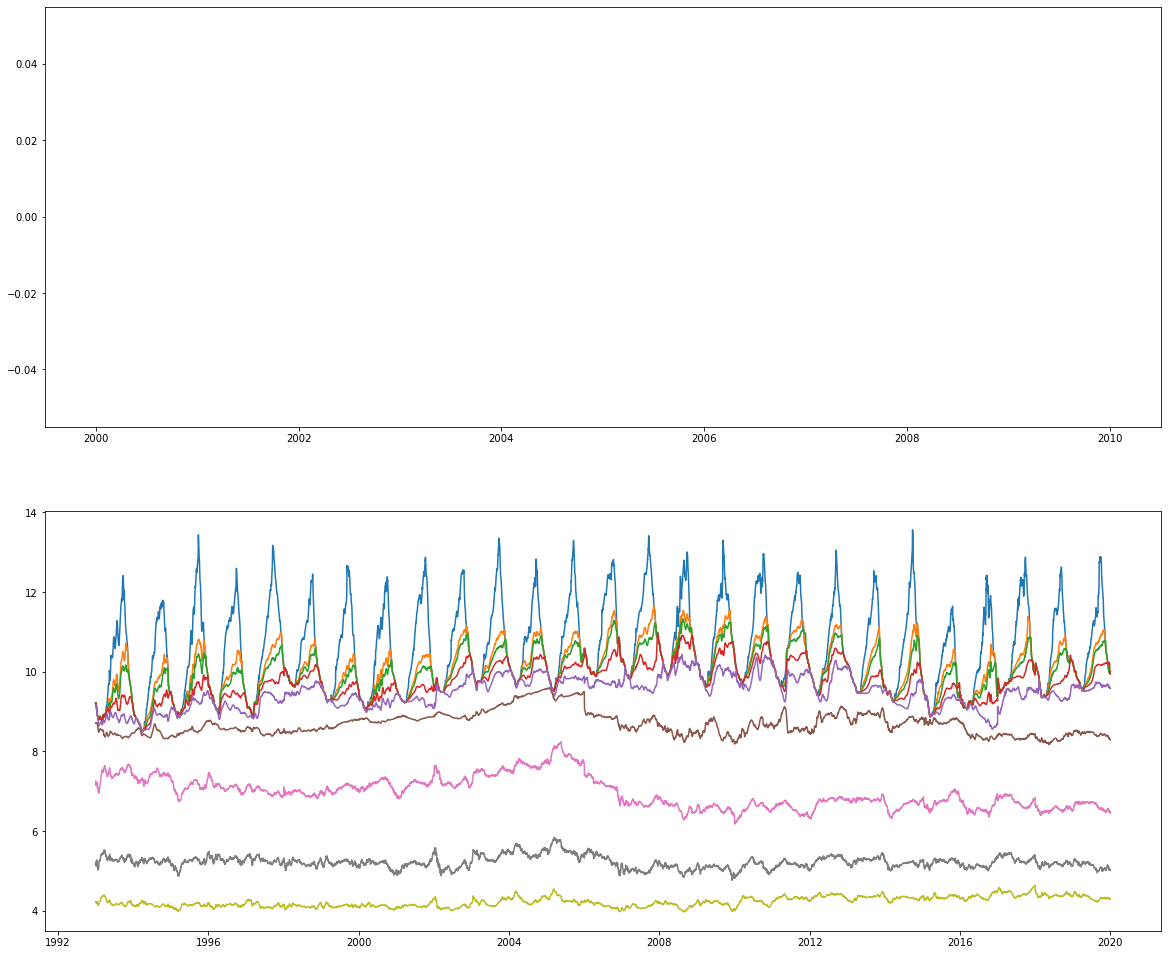

In [18]:
fig, ax = plt.subplots(2,1, figsize = (20,17))
ax[0].plot(oras5_EB.TIME, oras5_EB.sel(DEPTH= 1450, method = 'nearest'), color = 'grey')
ax[1].plot(oras5_WB.TIME, oras5_WB);

# Eastern Boundary clim

In [19]:
t_EB = np.arange(
        date(1993,1,1).toordinal(),
        date(2019,12,31).toordinal()+1,1)
temp_EB = np.array(oras5_EB.sel(DEPTH=100, method= 'nearest'))

In [20]:
mhws_EB, clim_EB = mhw.detect(t_EB,temp_EB)

In [21]:
print(mhws_EB['n_events'])

19


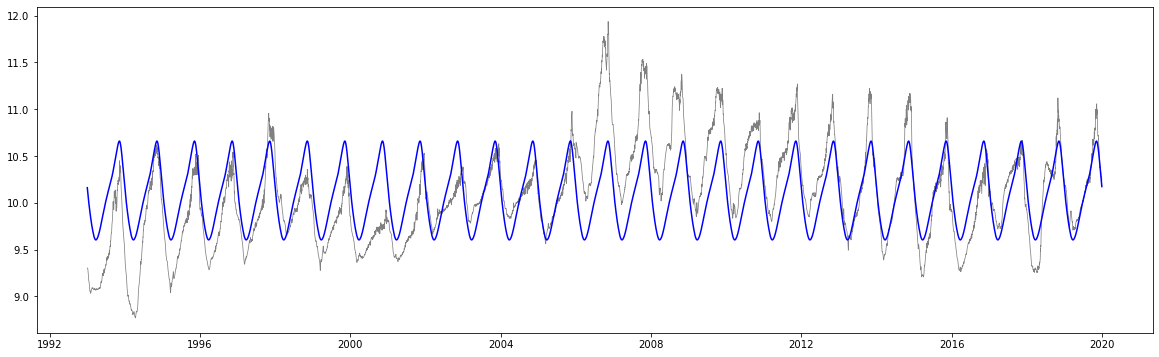

In [22]:
fig, ax=plt.subplots(figsize=(20,6))

ax.plot(oras5_EB.TIME, temp_EB, 'grey', linewidth='.75')
ax.plot(oras5_EB.TIME, clim_EB['seas'], 'b');

In [23]:
clim_EB = pd.DataFrame.from_dict(clim_EB)

In [24]:
clim_EB.to_csv('data/clim_EB.csv',index=False)